In [70]:
import newspaper
from newspaper import Article, Config
import glob
import json
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace
from pathlib import Path
from tqdm.auto import tqdm
tqdm.pandas()

In [17]:
fnames = glob.glob('newsdata/downloaded/*.json')

# 일별 발행갯수 추이

In [26]:
publish_count = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']

    if pub not in publish_count:
        publish_count[pub] = {}
        
    if published_at not in publish_count[pub]:
        publish_count[pub][published_at] = 0
        
    publish_count[pub][published_at] += 1

In [50]:
df_count = pd.DataFrame.from_dict(publish_count, orient='index').T.sort_index().iloc[-30:-1]
df_count.index = pd.to_datetime(df_count.index); df

,abcnews,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,foxbusiness,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-08-31,11.0,6.0,14.0,3.0,21.0,13.0,6.0,21.0,3.0,16.0,...,6.0,2.0,5.0,14.0,NaN,16.0,16.0,7.0,47.0,5.0
2019-09-01,24.0,8.0,31.0,18.0,44.0,30.0,14.0,22.0,19.0,13.0,...,NaN,NaN,3.0,19.0,7.0,55.0,58.0,26.0,109.0,9.0
2019-09-02,30.0,8.0,73.0,86.0,49.0,34.0,30.0,55.0,17.0,12.0,...,NaN,NaN,2.0,22.0,13.0,64.0,116.0,41.0,235.0,14.0
2019-09-03,48.0,10.0,83.0,242.0,68.0,52.0,52.0,60.0,25.0,27.0,...,34.0,6.0,3.0,48.0,11.0,108.0,130.0,54.0,288.0,31.0
2019-09-04,17.0,8.0,34.0,128.0,29.0,19.0,53.0,97.0,7.0,44.0,...,4.0,6.0,19.0,38.0,15.0,62.0,74.0,29.0,221.0,13.0
2019-09-05,47.0,28.0,83.0,281.0,72.0,46.0,48.0,84.0,26.0,36.0,...,19.0,7.0,13.0,47.0,16.0,110.0,115.0,63.0,159.0,29.0
2019-09-06,47.0,24.0,84.0,183.0,95.0,50.0,62.0,99.0,27.0,31.0,...,32.0,NaN,16.0,41.0,10.0,133.0,128.0,82.0,283.0,36.0
2019-09-07,12.0,10.0,33.0,174.0,38.0,27.0,22.0,35.0,17.0,9.0,...,2.0,NaN,4.0,12.0,10.0,60.0,60.0,24.0,215.0,5.0
2019-09-08,26.0,7.0,59.0,134.0,45.0,37.0,12.0,46.0,25.0,6.0,...,NaN,NaN,7.0,17.0,7.0,87.0,158.0,45.0,257.0,7.0
2019-09-09,63.0,27.0,85.0,291.0,74.0,60.0,59.0,109.0,28.0,30.0,...,26.0,NaN,11.0,46.0,15.0,130.0,190.0,86.0,298.0,41.0


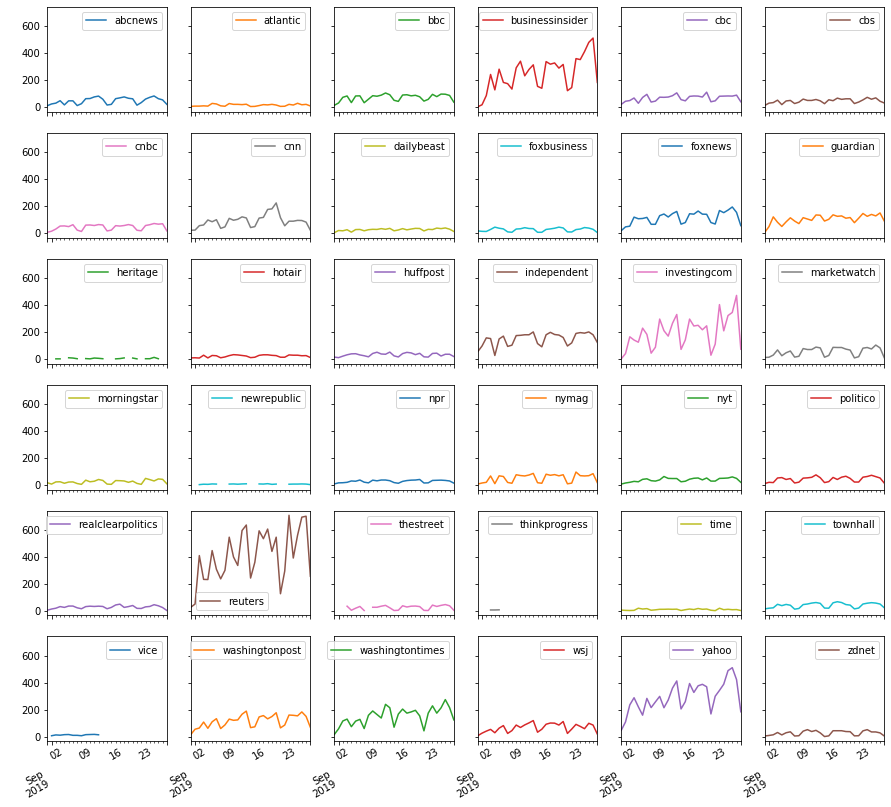

In [51]:
np.log(df_count).plot(subplots=True, layout=(6, 6), figsize=(15, 15), sharex=True, sharey=True);

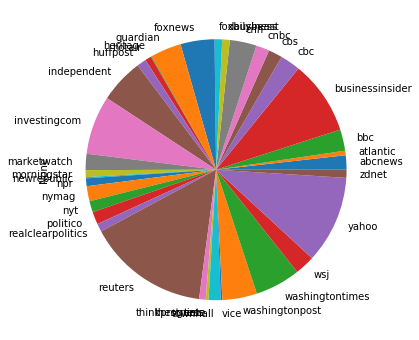

In [58]:
df_count.sum().plot.pie(figsize=(6, 6));

# 일별 총 글자수 추이

In [47]:
publish_size = {}

for fname in tqdm(fnames):
    js = json.loads(Path(fname).read_text())
    pub = js['pub']
    published_at = js['published_at']
    size = len(js['text'])

    if pub not in publish_size:
        publish_size[pub] = {}
        
    if published_at not in publish_size[pub]:
        publish_size[pub][published_at] = 0
        
    publish_size[pub][published_at] += size

In [48]:
df_size = pd.DataFrame.from_dict(publish_size, orient='index').T.sort_index().iloc[-30:-1]
df_size.index = pd.to_datetime(df_size.index); df_size

,abcnews,atlantic,bbc,businessinsider,cbc,cbs,cnbc,cnn,dailybeast,foxbusiness,...,thestreet,thinkprogress,time,townhall,vice,washingtonpost,washingtontimes,wsj,yahoo,zdnet
2019-08-31,43464.0,19087.0,51319.0,73300.0,99638.0,39015.0,28484.0,62014.0,11738.0,37315.0,...,19090.0,13667.0,29137.0,72363.0,NaN,127921.0,48391.0,50083.0,130587.0,11894.0
2019-09-01,94138.0,22874.0,97901.0,69558.0,186967.0,135039.0,41436.0,74933.0,129689.0,34181.0,...,NaN,NaN,16225.0,77792.0,40746.0,351719.0,223944.0,136040.0,357857.0,37152.0
2019-09-02,88378.0,23951.0,288955.0,298938.0,236002.0,114207.0,77149.0,194534.0,131146.0,24556.0,...,NaN,NaN,3549.0,84000.0,44405.0,403989.0,397951.0,226639.0,768705.0,49587.0
2019-09-03,131989.0,32088.0,366967.0,723553.0,302212.0,168202.0,115837.0,185610.0,116964.0,55249.0,...,88244.0,23274.0,20596.0,222857.0,53713.0,660749.0,418659.0,258740.0,915384.0,139650.0
2019-09-04,59965.0,46690.0,160379.0,460752.0,106468.0,54796.0,147481.0,327259.0,36305.0,98207.0,...,16774.0,22796.0,85977.0,143004.0,68825.0,346788.0,241870.0,126046.0,704325.0,48730.0
2019-09-05,197578.0,168445.0,341612.0,949760.0,347363.0,161289.0,121578.0,324097.0,120720.0,81058.0,...,48173.0,40086.0,64390.0,190855.0,67260.0,827823.0,378854.0,319241.0,521651.0,112775.0
2019-09-06,168970.0,111471.0,456452.0,615477.0,418173.0,172292.0,151280.0,321285.0,116364.0,67313.0,...,90197.0,NaN,58204.0,158166.0,46389.0,852927.0,374479.0,419617.0,871619.0,162313.0
2019-09-07,54590.0,52918.0,136738.0,598825.0,180272.0,72385.0,61058.0,147898.0,105935.0,31223.0,...,8554.0,NaN,26541.0,42027.0,63772.0,372183.0,195088.0,122760.0,689912.0,16813.0
2019-09-08,114665.0,19357.0,249175.0,434722.0,199959.0,177503.0,28576.0,187944.0,208913.0,10386.0,...,NaN,NaN,19223.0,58061.0,42544.0,541715.0,476886.0,228785.0,839127.0,20839.0
2019-09-09,186972.0,106960.0,353336.0,925335.0,302200.0,176551.0,215721.0,306941.0,124687.0,63271.0,...,73200.0,NaN,44063.0,174184.0,59245.0,791849.0,648073.0,370637.0,1005951.0,127411.0


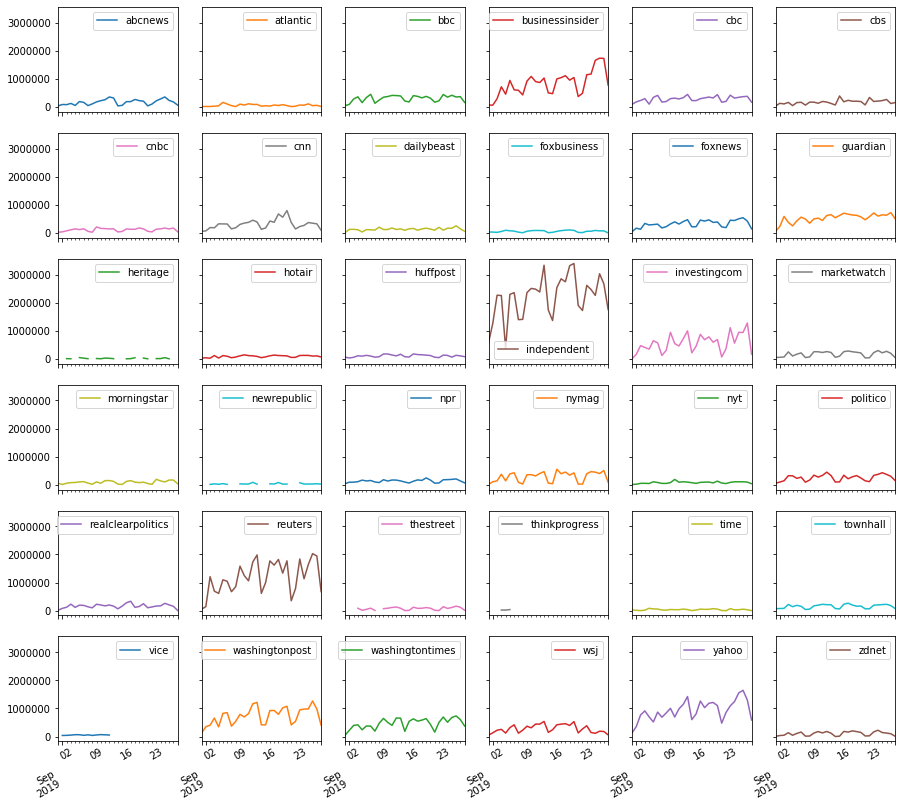

In [49]:
df_size.plot(subplots=True, layout=(6, 6), figsize=(15, 15), sharex=True, sharey=True);

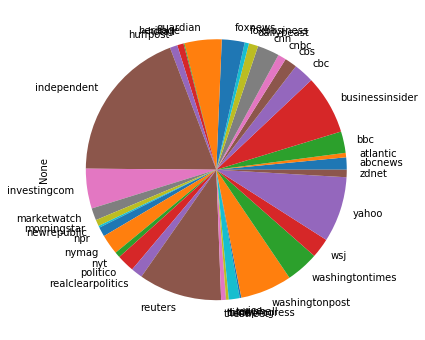

In [59]:
df_size.sum().plot.pie(figsize=(6, 6));

# 일별 아티클당 평균 글자수 추이

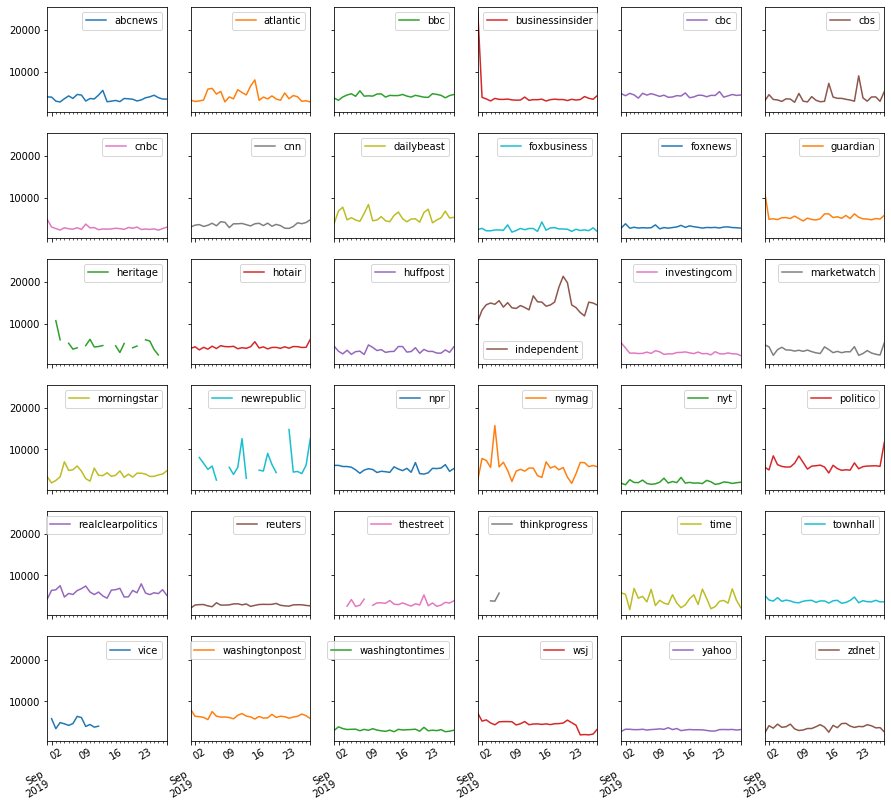

In [53]:
(df_size/df_count).plot(subplots=True, layout=(6, 6), figsize=(15, 15), sharex=True, sharey=True);

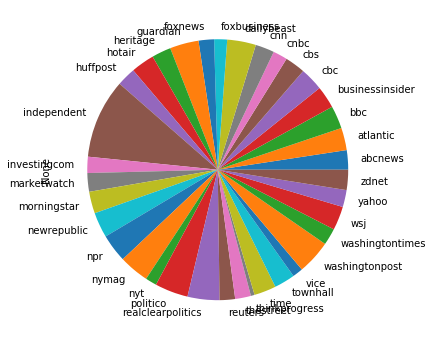

In [60]:
(df_size/df_count).sum().plot.pie(figsize=(6, 6));